# Importing Necessary Libraries

In [437]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

# Dataset Loading

In [438]:
# Reading the shared bike file on which analysis needs to be done
df=pd.read_csv("day (2).csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

# Data Sanity Checks

In [439]:
df.shape

(730, 16)

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Dataset has 730 rows and 16 columns.Except one column, all other are either float or integer type.
One column is date type.Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
We will analyse and finalize whether to convert them to categorical or treat as integer.

# Missing Value Check

In [441]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [442]:
#There is no missing value in the data.

# Dropping unwanted columns

In [443]:
#The column "instant" and "dteday" have no effect on target variable.And target column is a combination of "casual",and "registered".So these 4 column can be dropped.
df=df.drop(["instant","dteday","casual","registered"],axis=1)

In [444]:
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

# EDA

In [445]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [446]:
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols=["temp","atemp","hum","windspeed"]
target=["cnt"]
len(cat_cols)+len(cont_cols)+len(target)

12

# Univariate Analysis

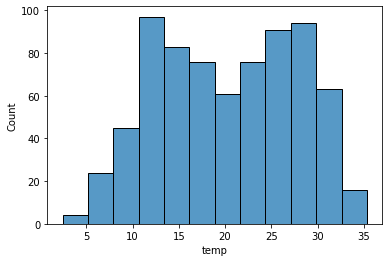

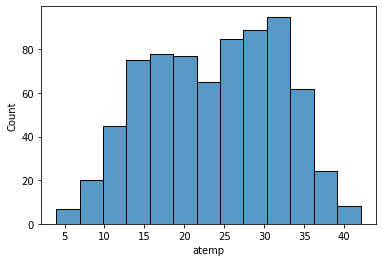

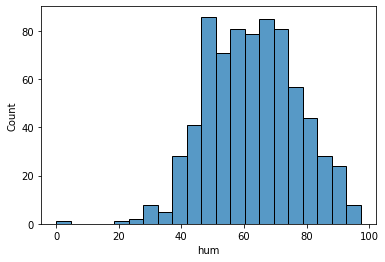

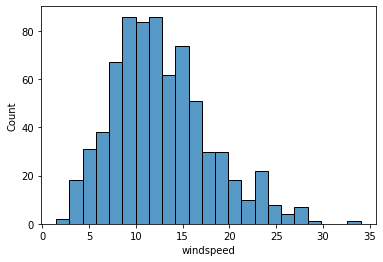

In [447]:
#plotting histogram for continous variable
for i in cont_cols:
    sns.histplot(df[i])
    plt.show()

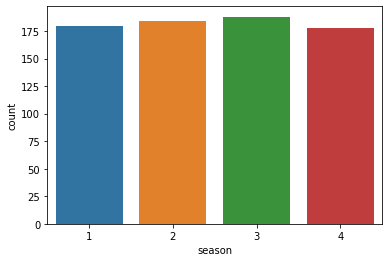

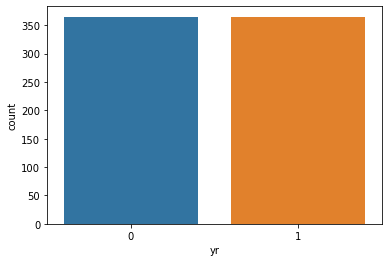

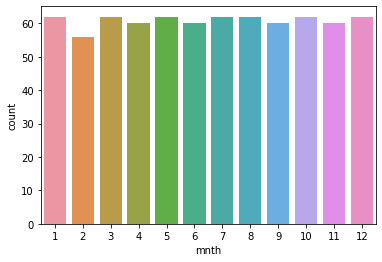

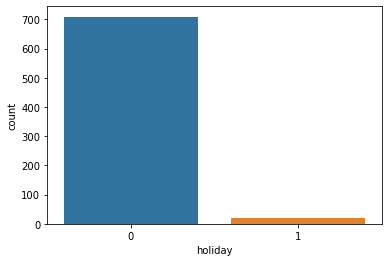

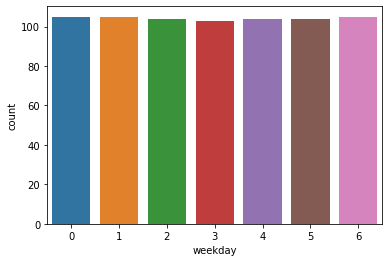

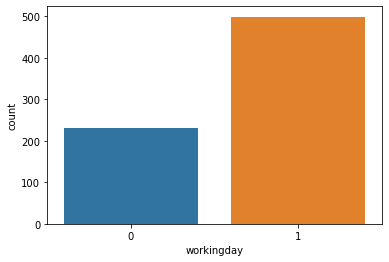

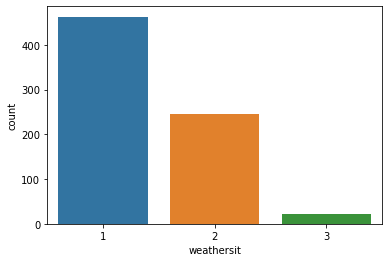

In [448]:
#plotting bardiagram for categoric variable
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

# Bivariate Analysis

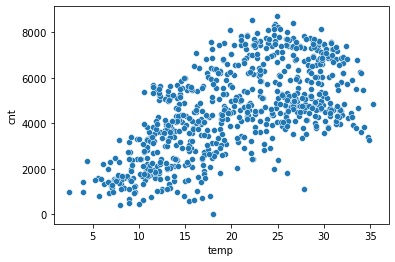

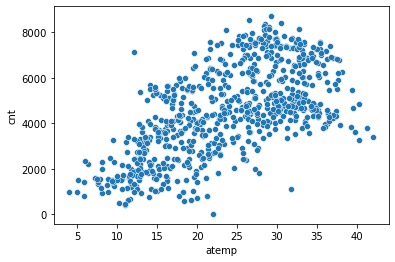

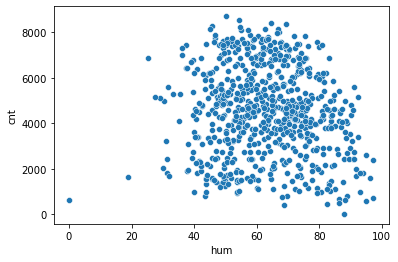

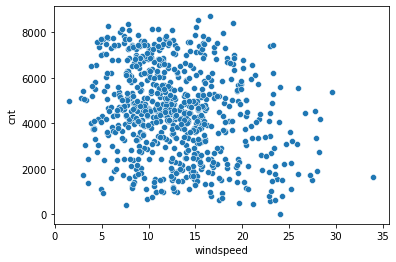

In [449]:
for i in cont_cols:
    sns.scatterplot(df[i],df["cnt"])
    plt.show()

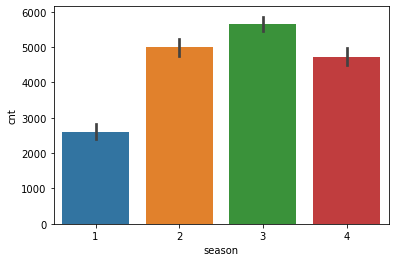

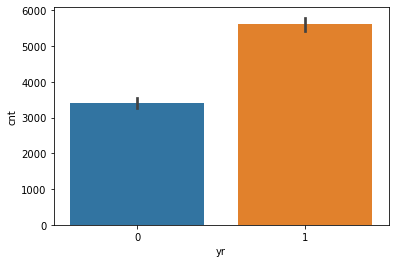

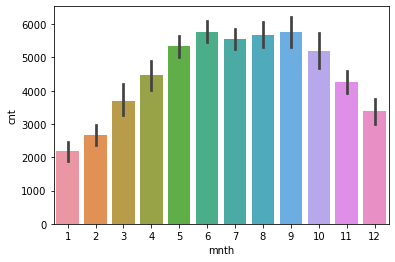

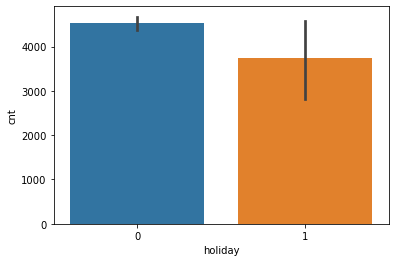

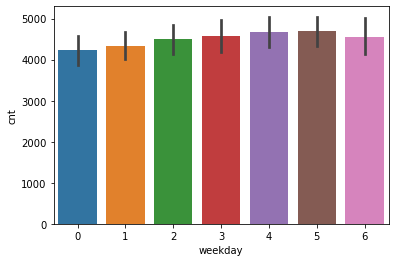

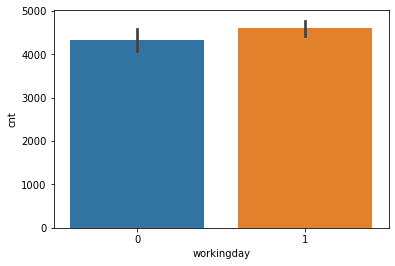

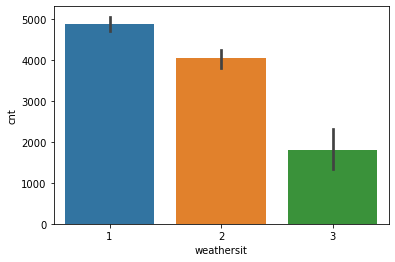

In [450]:
for i in cat_cols:
    sns.barplot(df[i],df["cnt"])
    plt.show()

# Multivariate Analysis

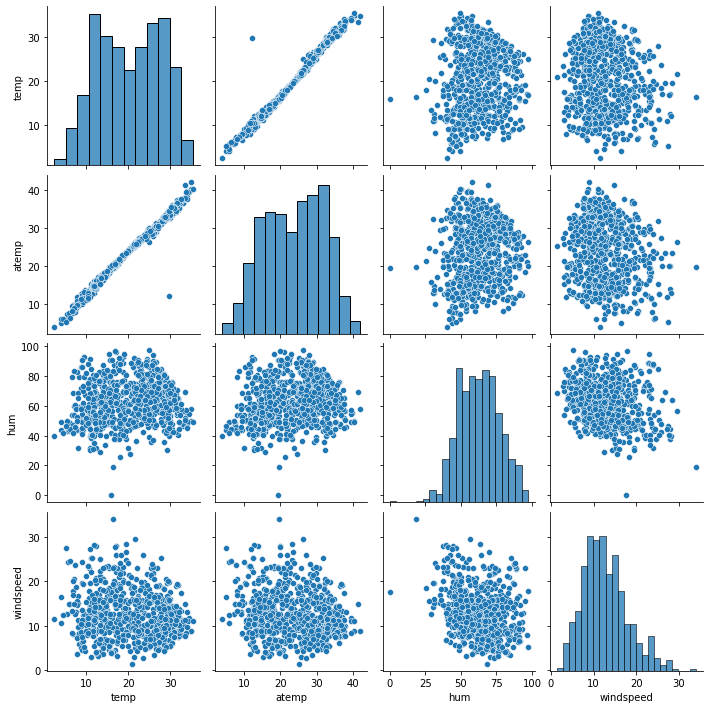

In [451]:
sns.pairplot(df[cont_cols])

<AxesSubplot:>

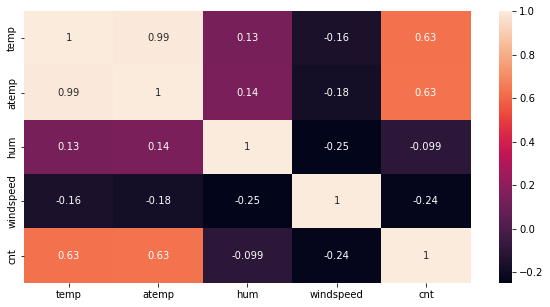

In [452]:
plt.figure(figsize=(10,5))
sns.heatmap(df[cont_cols+["cnt"]].corr(),annot=True)

# FINDINGS

1.There is a linear relation between temp,atemp and count of total rental bike.ie;as temp and atemp increases count of rental bike also increases.

2.season is a factor that depend upon cnt.more number of bikes are booked in season 2 and 3.ie;summer and fall

3.There is a significant difference in bookings between 2018 and 2019. Approximately twice of what was scheduled in 2018 is booked in 2019.

4.More number of booking is happened in months 5,6,7,8,9

5.holiday is not a factor that depend upon booking.more number of booking is happened in working day

6.Weathershit is also a largely effecting factor.more number of booking is happened in Clear, Few clouds, Partly cloudy, Partly cloudy

# Pre-processing Steps

Dummy Variable Creation

In [453]:
df[cat_cols].nunique()# Only for non binary categorical columns

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [454]:
#creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [456]:
df.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.763620  4508.006849  
std      0.544807    7.506729    8.150308   14.237589    5.195841  1936.011647  
min      1.000000    2.424346    3.953480    0.000000    1.500244    22.000000  
25%      1.000000   13.811885   16.889713   52.000000    9.041650  3169.750000  
50%      1.000000   20.465826   24.368225   62.625000   12.125325  4548.500000  
75%      2.000000   26.880615   30.445775   72.989575   15.625589  5966.000000  
max      3.000000   35.328347   42.044800   97.250000   34.000021  8714.000000

In [457]:
#Before creating dummy variables, we will have to convert them into 'category' data types.
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [459]:
#creating dummy variable for season
dum=pd.get_dummies(df["season"],prefix='season',drop_first=True)
dum.head()

season_2  season_3  season_4
0         0         0         0
1         0         0         0
2         0         0         0
3         0         0         0
4         0         0         0

In [460]:
#Adding dummy variable to original file
df1=pd.concat([df,dum],axis=1)
df1.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0      1   0    1        0       6           0          2  14.110847   
1      1   0    1        0       0           0          2  14.902598   
2      1   0    1        0       1           1          1   8.050924   
3      1   0    1        0       2           1          1   8.200000   
4      1   0    1        0       3           1          1   9.305237   

      atemp      hum  windspeed   cnt  season_2  season_3  season_4  
0  18.18125  80.5833  10.749882   985         0         0         0  
1  17.68695  69.6087  16.652113   801         0         0         0  
2   9.47025  43.7273  16.636703  1349         0         0         0  
3  10.60610  59.0435  10.739832  1562         0         0         0  
4  11.46350  43.6957  12.522300  1600         0         0         0

In [461]:
#dropping original season column
df1=df1.drop(["season"],axis=1)
df1.head()

yr mnth  holiday weekday  workingday weathersit       temp     atemp  \
0   0    1        0       6           0          2  14.110847  18.18125   
1   0    1        0       0           0          2  14.902598  17.68695   
2   0    1        0       1           1          1   8.050924   9.47025   
3   0    1        0       2           1          1   8.200000  10.60610   
4   0    1        0       3           1          1   9.305237  11.46350   

       hum  windspeed   cnt  season_2  season_3  season_4  
0  80.5833  10.749882   985         0         0         0  
1  69.6087  16.652113   801         0         0         0  
2  43.7273  16.636703  1349         0         0         0  
3  59.0435  10.739832  1562         0         0         0  
4  43.6957  12.522300  1600         0         0         0

In [462]:
df1.shape

(730, 14)

In [463]:
#creating dummy variable for mnth
dum1=pd.get_dummies(df1["mnth"],prefix='mnth',drop_first=True)
df1=pd.concat([df1,dum1],axis=1)
df1=df1.drop(["mnth"],axis=1)
df1

yr  holiday weekday  workingday weathersit       temp     atemp      hum  \
0     0        0       6           0          2  14.110847  18.18125  80.5833   
1     0        0       0           0          2  14.902598  17.68695  69.6087   
2     0        0       1           1          1   8.050924   9.47025  43.7273   
3     0        0       2           1          1   8.200000  10.60610  59.0435   
4     0        0       3           1          1   9.305237  11.46350  43.6957   
..   ..      ...     ...         ...        ...        ...       ...      ...   
725   1        0       4           1          2  10.420847  11.33210  65.2917   
726   1        0       5           1          2  10.386653  12.75230  59.0000   
727   1        0       6           0          2  10.386653  12.12000  75.2917   
728   1        0       0           0          1  10.489153  11.58500  48.3333   
729   1        0       1           1          2   8.849153  11.17435  57.7500   

     windspeed   cnt  ...  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  mnth_8  \
0    10.749882   985  ...       0       0       0       0       0       0   
1    16.652113   801  ...       0       0       0       0       0       0   
2    16.636703  1349  ...       0       0       0       0       0       0   
3    10.739832  1562  ...       0       0       0       0       0       0   
4    12.522300  1600  ...       0       0       0       0       0       0   
..         ...   ...  ...     ...     ...     ...     ...     ...     ...   
725  23.458911  2114  ...       0       0       0       0       0       0   
726  10.416557  3095  ...       0       0       0       0       0       0   
727   8.333661  1341  ...       0       0       0       0       0       0   
728  23.500518  1796  ...       0       0       0       0       0       0   
729  10.374682  2729  ...       0       0       0       0       0       0   

     mnth_9  mnth_10  mnth_11  mnth_12  
0         0        0        0        0  
1         0        0        0        0  
2         0        0        0        0  
3         0        0        0        0  
4         0        0        0        0  
..      ...      ...      ...      ...  
725       0        0        0        1  
726       0        0        0        1  
727       0        0        0        1  
728       0        0        0        1  
729       0        0        0        1  

[730 rows x 24 columns]

In [464]:
df1.shape

(730, 24)

In [465]:
#creating dummy variable for weekday
dum2=pd.get_dummies(df1["weekday"],prefix='weekday',drop_first=True)
df1=pd.concat([df1,dum2],axis=1)
df1=df1.drop(["weekday"],axis=1)
df1

yr  holiday  workingday weathersit       temp     atemp      hum  \
0     0        0           0          2  14.110847  18.18125  80.5833   
1     0        0           0          2  14.902598  17.68695  69.6087   
2     0        0           1          1   8.050924   9.47025  43.7273   
3     0        0           1          1   8.200000  10.60610  59.0435   
4     0        0           1          1   9.305237  11.46350  43.6957   
..   ..      ...         ...        ...        ...       ...      ...   
725   1        0           1          2  10.420847  11.33210  65.2917   
726   1        0           1          2  10.386653  12.75230  59.0000   
727   1        0           0          2  10.386653  12.12000  75.2917   
728   1        0           0          1  10.489153  11.58500  48.3333   
729   1        0           1          2   8.849153  11.17435  57.7500   

     windspeed   cnt  season_2  ...  mnth_9  mnth_10  mnth_11  mnth_12  \
0    10.749882   985         0  ...       0        0        0        0   
1    16.652113   801         0  ...       0        0        0        0   
2    16.636703  1349         0  ...       0        0        0        0   
3    10.739832  1562         0  ...       0        0        0        0   
4    12.522300  1600         0  ...       0        0        0        0   
..         ...   ...       ...  ...     ...      ...      ...      ...   
725  23.458911  2114         0  ...       0        0        0        1   
726  10.416557  3095         0  ...       0        0        0        1   
727   8.333661  1341         0  ...       0        0        0        1   
728  23.500518  1796         0  ...       0        0        0        1   
729  10.374682  2729         0  ...       0        0        0        1   

     weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0            0          0          0          0          0          1  
1            0          0          0          0          0          0  
2            1          0          0          0          0          0  
3            0          1          0          0          0          0  
4            0          0          1          0          0          0  
..         ...        ...        ...        ...        ...        ...  
725          0          0          0          1          0          0  
726          0          0          0          0          1          0  
727          0          0          0          0          0          1  
728          0          0          0          0          0          0  
729          1          0          0          0          0          0  

[730 rows x 29 columns]

In [466]:
df1.shape

(730, 29)

In [467]:
#creating dummy variable for weathersit
dum2=pd.get_dummies(df1["weathersit"],prefix='weathersit',drop_first=True)
df1=pd.concat([df1,dum2],axis=1)
df1=df1.drop(["weathersit"],axis=1)
df1

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0     0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1     0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350  43.6957  12.522300  1600   
..   ..      ...         ...        ...       ...      ...        ...   ...   
725   1        0           1  10.420847  11.33210  65.2917  23.458911  2114   
726   1        0           1  10.386653  12.75230  59.0000  10.416557  3095   
727   1        0           0  10.386653  12.12000  75.2917   8.333661  1341   
728   1        0           0  10.489153  11.58500  48.3333  23.500518  1796   
729   1        0           1   8.849153  11.17435  57.7500  10.374682  2729   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
0           0         0  ...        0        0          0          0   
1           0         0  ...        0        0          0          0   
2           0         0  ...        0        0          1          0   
3           0         0  ...        0        0          0          1   
4           0         0  ...        0        0          0          0   
..        ...       ...  ...      ...      ...        ...        ...   
725         0         0  ...        0        1          0          0   
726         0         0  ...        0        1          0          0   
727         0         0  ...        0        1          0          0   
728         0         0  ...        0        1          0          0   
729         0         0  ...        0        1          1          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0            0          0          0          1             1             0  
1            0          0          0          0             1             0  
2            0          0          0          0             0             0  
3            0          0          0          0             0             0  
4            1          0          0          0             0             0  
..         ...        ...        ...        ...           ...           ...  
725          0          1          0          0             1             0  
726          0          0          1          0             1             0  
727          0          0          0          1             1             0  
728          0          0          0          0             0             0  
729          0          0          0          0             1             0  

[730 rows x 30 columns]

In [468]:
df1.shape

(730, 30)

# Train-Test Split

In [469]:
#Splitting the data to Train and Test.(70:30 ratio)
#We will use train_test_split method from sklearn package for this

In [470]:
X=df1.drop(["cnt"],axis=1)

In [471]:
y=df1["cnt"]

In [472]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [473]:
X_train.shape

(511, 29)

In [474]:
X_test.shape

(219, 29)

# Scaling

In [475]:
X_train=(X_train-X_train.mean())/X_train.std()


In [476]:
X_test=(X_test-X_test.mean())/X_test.std()

In [477]:
X_train.describe()

yr       holiday    workingday          temp         atemp  \
count  5.110000e+02  5.110000e+02  5.110000e+02  5.110000e+02  5.110000e+02   
mean   5.475072e-17  3.384985e-16  9.125121e-17  1.857505e-15  1.527480e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.016774e+00 -1.614104e-01 -1.446674e+00 -2.381610e+00 -2.418135e+00   
25%   -1.016774e+00 -1.614104e-01 -1.446674e+00 -8.696820e-01 -8.492974e-01   
50%    9.815780e-01 -1.614104e-01  6.898880e-01  2.079133e-02  7.618530e-02   
75%    9.815780e-01 -1.614104e-01  6.898880e-01  8.767475e-01  8.262114e-01   
max    9.815780e-01  6.183262e+00  6.898880e-01  2.050236e+00  2.294357e+00   

                hum     windspeed      season_2      season_3      season_4  \
count  5.110000e+02  5.110000e+02  5.110000e+02  5.110000e+02  5.110000e+02   
mean  -7.241435e-16 -2.115073e-15 -1.798952e-16 -2.998254e-17  9.081668e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.462250e+00 -1.891332e+00 -5.715175e-01 -5.956023e-01 -5.745276e-01   
25%   -7.648886e-01 -7.171991e-01 -5.715175e-01 -5.956023e-01 -5.745276e-01   
50%    2.172507e-02 -1.340854e-01 -5.715175e-01 -5.956023e-01 -5.745276e-01   
75%    7.140587e-01  5.517224e-01 -5.715175e-01  1.675687e+00 -5.745276e-01   
max    2.399232e+00  4.003534e+00  1.746304e+00  1.675687e+00  1.737154e+00   

       ...       mnth_11       mnth_12     weekday_1     weekday_2  \
count  ...  5.110000e+02  5.110000e+02  5.110000e+02  5.110000e+02   
mean   ... -4.453928e-17  6.930746e-17  1.224287e-16 -1.399185e-16   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -3.066497e-01 -3.028210e-01 -4.207994e-01 -3.914058e-01   
25%    ... -3.066497e-01 -3.028210e-01 -4.207994e-01 -3.914058e-01   
50%    ... -3.066497e-01 -3.028210e-01 -4.207994e-01 -3.914058e-01   
75%    ... -3.066497e-01 -3.028210e-01 -4.207994e-01 -3.914058e-01   
max    ...  3.254668e+00  3.295819e+00  2.371779e+00  2.549894e+00   

          weekday_3     weekday_4     weekday_5     weekday_6  weathersit_2  \
count  5.110000e+02  5.110000e+02  5.110000e+02  5.110000e+02  5.110000e+02   
mean   1.716392e-17  5.409893e-17  9.190300e-17  1.505645e-16  5.301261e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.335937e-01 -3.914058e-01 -3.813852e-01 -4.272148e-01 -7.241167e-01   
25%   -4.335937e-01 -3.914058e-01 -3.813852e-01 -4.272148e-01 -7.241167e-01   
50%   -4.335937e-01 -3.914058e-01 -3.813852e-01 -4.272148e-01 -7.241167e-01   
75%   -4.335937e-01 -3.914058e-01 -3.813852e-01 -4.272148e-01  1.378290e+00   
max    2.301793e+00  2.549894e+00  2.616890e+00  2.336162e+00  1.378290e+00   

       weathersit_3  
count  5.110000e+02  
mean  -1.633831e-16  
std    1.000000e+00  
min   -1.737318e-01  
25%   -1.737318e-01  
50%   -1.737318e-01  
75%   -1.737318e-01  
max    5.744733e+00  

[8 rows x 29 columns]

# Modelling

Feature Selection

In [478]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True])

In [479]:
selected_features=list(X_train.columns[selector.support_])
selected_features

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_2',
 'season_4',
 'mnth_9',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weathersit_3']

In [480]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [481]:
# Add a constant
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [482]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          8.90e-181
Time:                        21:09:36   Log-Likelihood:                -4143.2
No. Observations:                 511   AIC:                             8316.
Df Residuals:                     496   BIC:                             8380.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     36.084    124.467      0.000    4420.407    4562.200
yr             988.9662     36.646     26.987      0.000     916.965    1060.967
holiday       -3.57e+15   2.22e+15     -1.607      0.109   -7.93e+15    7.95e+14
workingday    -1.06e+16    6.6e+15     -1.607      0.109   -2.36e+16    2.36e+15
temp          1160.8727     39.703     29.239      0.000    1082.865    1238.880
hum           -348.7310     40.599     -8.590      0.000    -428.498    -268.964
windspeed     -292.0300     39.043     -7.480      0.000    -368.741    -215.319
season_2       332.7598     39.502      8.424      0.000     255.148     410.371
season_4       546.9314     40.368     13.549      0.000     467.619     626.244
mnth_9         246.6793     38.171      6.463      0.000     171.683     321.675
weekday_1     8.111e+15   5.05e+15      1.607      0.109   -1.81e+15     1.8e+16
weekday_2     7.701e+15   4.79e+15      1.607      0.109   -1.71e+15    1.71e+16
weekday_3      8.28e+15   5.15e+15      1.607      0.109   -1.84e+15    1.84e+16
weekday_4     7.701e+15   4.79e+15      1.607      0.109   -1.71e+15    1.71e+16
weekday_5     7.554e+15    4.7e+15      1.607      0.109   -1.68e+15    1.68e+16
weathersit_3  -292.1437     38.263     -7.635      0.000    -367.321    -216.966
==============================================================================
Omnibus:                       62.323   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.739
Skew:                          -0.735   Prob(JB):                     2.00e-25
Kurtosis:                       4.784   Cond. No.                     4.66e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.95e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [483]:
#p value is greater than 0.05 and equal for 7 variables.So VIF value is checked next

In [484]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data


Feature       VIF
0             yr  1.029334
1        holiday       inf
2     workingday       inf
3           temp  1.207979
4            hum  1.254676
5      windspeed  1.160392
6       season_2  1.195546
7       season_4  1.248138
8         mnth_9  1.116605
9      weekday_1       inf
10     weekday_2       inf
11     weekday_3       inf
12     weekday_4       inf
13     weekday_5       inf
14  weathersit_3  1.119265

In [485]:
#VIF value is infinite for 7 variable. VIF indicates that there is perfect multicollinearity between the predictor variable and other variables in the model.When a variable has a VIF of inf, it is recommended to remove it from the model as it is not contributing to the model and can even cause issues with the stability of the regression estimates.

In [486]:
#Dropping variable holiday
X_train_sm=X_train_sm.drop(["holiday"],axis=1)
X_test_sm=X_test_sm.drop(["holiday"],axis=1)

In [487]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.07e-181
Time:                        21:09:37   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     496   BIC:                             8377.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     35.978    124.836      0.000    4420.616    4561.991
yr             989.2556     36.538     27.075      0.000     917.468    1061.043
workingday     369.8104    112.355      3.291      0.001     149.059     590.562
temp          1161.8859     39.581     29.355      0.000    1084.119    1239.653
hum           -354.1590     40.339     -8.780      0.000    -433.415    -274.903
windspeed     -297.2408     38.794     -7.662      0.000    -373.461    -221.021
season_2       334.0625     39.377      8.484      0.000     256.697     411.428
season_4       548.6955     40.234     13.638      0.000     469.646     627.745
mnth_9         245.8742     38.055      6.461      0.000     171.106     320.642
weekday_1     -263.2073     85.136     -3.092      0.002    -430.479     -95.935
weekday_2     -239.6610     90.884     -2.637      0.009    -418.225     -61.097
weekday_3     -224.8690     96.647     -2.327      0.020    -414.756     -34.982
weekday_4     -217.1551     88.929     -2.442      0.015    -391.879     -42.432
weekday_5     -200.7848     88.484     -2.269      0.024    -374.634     -26.935
weathersit_3  -288.9910     38.100     -7.585      0.000    -363.848    -214.134
==============================================================================
Omnibus:                       57.977   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.148
Skew:                          -0.679   Prob(JB):                     1.99e-24
Kurtosis:                       4.812   Cond. No.                         7.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [488]:
#All p value less than 0.05,So next VIF value is checked

In [489]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0          const  1.000000
1             yr  1.029362
2     workingday  9.733600
3           temp  1.207979
4            hum  1.254676
5      windspeed  1.160392
6       season_2  1.195546
7       season_4  1.248138
8         mnth_9  1.116605
9      weekday_1  5.588744
10     weekday_2  6.368785
11     weekday_3  7.202093
12     weekday_4  6.097750
13     weekday_5  6.036887
14  weathersit_3  1.119265

In [490]:
#VIF value of workingday>5.So it is dropped
X_train_sm=X_train_sm.drop(["workingday"],axis=1)
X_test_sm=X_test_sm.drop(["workingday"],axis=1)

In [491]:
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.7
Date:                Thu, 04 May 2023   Prob (F-statistic):          3.09e-180
Time:                        21:09:37   Log-Likelihood:                -4147.2
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     497   BIC:                             8382.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     36.332    123.619      0.000    4419.921    4562.686
yr             992.7571     36.882     26.917      0.000     920.294    1065.220
temp          1167.7533     39.930     29.245      0.000    1089.301    1246.206
hum           -350.5140     40.721     -8.608      0.000    -430.520    -270.508
windspeed     -299.6900     39.168     -7.651      0.000    -376.646    -222.734
season_2       339.1766     39.733      8.536      0.000     261.110     417.243
season_4       545.1017     40.615     13.421      0.000     465.304     624.899
mnth_9         239.1371     38.374      6.232      0.000     163.743     314.532
weekday_1      -17.3248     41.237     -0.420      0.675     -98.346      63.696
weekday_2       28.2274     40.840      0.691      0.490     -52.013     108.468
weekday_3       62.9584     41.557      1.515      0.130     -18.692     144.608
weekday_4       43.5042     40.855      1.065      0.287     -36.766     123.774
weekday_5       58.4592     40.717      1.436      0.152     -21.540     138.459
weathersit_3  -285.1356     38.457     -7.414      0.000    -360.694    -209.578
==============================================================================
Omnibus:                       68.262   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.576
Skew:                          -0.753   Prob(JB):                     4.91e-31
Kurtosis:                       5.071   Cond. No.                         2.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [492]:
#Removing the variable 'weekday_1' based on its Very High 'P' value.
X_train_sm=X_train_sm.drop(["weekday_1"],axis=1)
X_test_sm=X_test_sm.drop(["weekday_1"],axis=1)

In [493]:
model4=sm.OLS(y_train,X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.34e-181
Time:                        21:09:37   Log-Likelihood:                -4147.3
No. Observations:                 511   AIC:                             8321.
Df Residuals:                     498   BIC:                             8376.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     36.302    123.722      0.000    4419.980    4562.627
yr             991.8724     36.791     26.960      0.000     919.587    1064.157
temp          1168.0661     39.890     29.282      0.000    1089.692    1246.440
hum           -350.9695     40.672     -8.629      0.000    -430.880    -271.059
windspeed     -299.4250     39.131     -7.652      0.000    -376.307    -222.543
season_2       338.8726     39.694      8.537      0.000     260.884     416.861
season_4       545.0390     40.581     13.431      0.000     465.308     624.770
mnth_9         238.9053     38.338      6.232      0.000     163.581     314.229
weekday_2       33.7564     38.630      0.874      0.383     -42.141     109.654
weekday_3       68.9245     39.024      1.766      0.078      -7.747     145.596
weekday_4       49.0089     38.665      1.268      0.206     -26.958     124.975
weekday_5       63.8603     38.603      1.654      0.099     -11.984     139.704
weathersit_3  -285.0811     38.425     -7.419      0.000    -360.576    -209.586
==============================================================================
Omnibus:                       67.480   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.360
Skew:                          -0.742   Prob(JB):                     5.47e-31
Kurtosis:                       5.084   Cond. No.                         1.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [494]:
#Removing the variable 'weekday_2' based on its p"value>0.05.
X_train_sm=X_train_sm.drop(["weekday_2"],axis=1)
X_test_sm=X_test_sm.drop(["weekday_2"],axis=1)

In [495]:
model5=sm.OLS(y_train,X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.26e-182
Time:                        21:09:37   Log-Likelihood:                -4147.7
No. Observations:                 511   AIC:                             8319.
Df Residuals:                     499   BIC:                             8370.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     36.293    123.751      0.000    4419.997    4562.609
yr             991.6262     36.781     26.960      0.000     919.361    1063.892
temp          1169.8622     39.828     29.373      0.000    1091.611    1248.113
hum           -350.7664     40.662     -8.626      0.000    -430.657    -270.876
windspeed     -299.5905     39.121     -7.658      0.000    -376.453    -222.728
season_2       339.5155     39.678      8.557      0.000     261.559     417.472
season_4       544.6328     40.569     13.425      0.000     464.927     624.339
mnth_9         238.7416     38.328      6.229      0.000     163.437     314.046
weekday_3       60.5560     37.821      1.601      0.110     -13.753     134.864
weekday_4       41.2941     37.635      1.097      0.273     -32.648     115.236
weekday_5       56.1912     37.583      1.495      0.136     -17.649     130.031
weathersit_3  -285.6809     38.410     -7.438      0.000    -361.145    -210.217
==============================================================================
Omnibus:                       68.374   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.546
Skew:                          -0.757   Prob(JB):                     8.22e-31
Kurtosis:                       5.053   Cond. No.                         1.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [496]:
#Removing the variable 'weekday_4' based on its p"value>0.05.
X_train_sm=X_train_sm.drop(["weekday_4"],axis=1)
X_test_sm=X_test_sm.drop(["weekday_4"],axis=1)

In [497]:
model6=sm.OLS(y_train,X_train_sm)
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.0
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.60e-183
Time:                        21:09:37   Log-Likelihood:                -4148.3
No. Observations:                 511   AIC:                             8319.
Df Residuals:                     500   BIC:                             8365.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     36.301    123.726      0.000    4419.983    4562.624
yr             991.1267     36.786     26.943      0.000     918.852    1063.401
temp          1170.1284     39.835     29.374      0.000    1091.864    1248.393
hum           -353.0332     40.618     -8.692      0.000    -432.836    -273.230
windspeed     -300.6617     39.117     -7.686      0.000    -377.515    -223.808
season_2       338.7879     39.680      8.538      0.000     260.827     416.749
season_4       543.4609     40.563     13.398      0.000     463.766     623.155
mnth_9         240.2456     38.312      6.271      0.000     164.974     315.517
weekday_3       52.1231     37.040      1.407      0.160     -20.649     124.896
weekday_5       48.6525     36.957      1.316      0.189     -23.957     121.263
weathersit_3  -283.3868     38.360     -7.387      0.000    -358.754    -208.019
==============================================================================
Omnibus:                       66.937   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.540
Skew:                          -0.751   Prob(JB):                     1.66e-29
Kurtosis:                       4.992   Cond. No.                         1.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [498]:
#Removing the variable 'weekday_5' based on p"value>0.05
X_train_sm=X_train_sm.drop(["weekday_5"],axis=1)
X_test_sm=X_test_sm.drop(["weekday_5"],axis=1)

In [499]:
model7=sm.OLS(y_train,X_train_sm)
res7=model7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     265.0
Date:                Thu, 04 May 2023   Prob (F-statistic):          3.67e-184
Time:                        21:09:37   Log-Likelihood:                -4149.2
No. Observations:                 511   AIC:                             8318.
Df Residuals:                     501   BIC:                             8361.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     36.327    123.635      0.000    4419.931    4562.675
yr             990.2882     36.807     26.905      0.000     917.972    1062.604
temp          1170.6264     39.862     29.367      0.000    1092.308    1248.945
hum           -352.7098     40.647     -8.677      0.000    -432.569    -272.850
windspeed     -301.3354     39.142     -7.698      0.000    -378.238    -224.433
season_2       337.4335     39.696      8.500      0.000     259.442     415.425
season_4       540.9655     40.548     13.341      0.000     461.300     620.631
mnth_9         239.8232     38.338      6.255      0.000     164.500     315.147
weekday_3       44.2131     36.576      1.209      0.227     -27.648     116.074
weathersit_3  -285.7738     38.346     -7.453      0.000    -361.112    -210.436
==============================================================================
Omnibus:                       66.675   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.301
Skew:                          -0.751   Prob(JB):                     3.08e-29
Kurtosis:                       4.978   Cond. No.                         1.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [500]:
#Removing the variable 'weekday_3' based on "p"value>0.05
X_train_sm=X_train_sm.drop(["weekday_3"],axis=1)
X_test_sm=X_test_sm.drop(["weekday_3"],axis=1)

In [501]:
model8=sm.OLS(y_train,X_train_sm)
res8=model8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.7
Date:                Thu, 04 May 2023   Prob (F-statistic):          4.27e-185
Time:                        21:09:37   Log-Likelihood:                -4150.0
No. Observations:                 511   AIC:                             8318.
Df Residuals:                     502   BIC:                             8356.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     36.344    123.578      0.000    4419.899    4562.708
yr             990.3941     36.824     26.895      0.000     918.046    1062.743
temp          1170.9789     39.880     29.363      0.000    1092.627    1249.331
hum           -351.8084     40.659     -8.653      0.000    -431.691    -271.926
windspeed     -302.3890     39.150     -7.724      0.000    -379.308    -225.470
season_2       339.1517     39.689      8.545      0.000     261.175     417.128
season_4       539.7898     40.555     13.310      0.000     460.111     619.468
mnth_9         240.9326     38.345      6.283      0.000     165.596     316.269
weathersit_3  -282.0281     38.238     -7.376      0.000    -357.154    -206.902
==============================================================================
Omnibus:                       68.563   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.803
Skew:                          -0.770   Prob(JB):                     5.34e-30
Kurtosis:                       4.990   Cond. No.                         1.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [502]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0         const  1.000000
1            yr  1.024606
2          temp  1.201694
3           hum  1.249101
4     windspeed  1.158142
5      season_2  1.190216
6      season_4  1.242738
7        mnth_9  1.110979
8  weathersit_3  1.104773

In [503]:
#This model looks good,"p"value and "vif"value are with in range. So it seems to be VERY LOW Multicollinearity between the predictors . For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

In [504]:
predicted_value=res8.predict(X_test_sm)

In [505]:
from sklearn.metrics import r2_score
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 79.76 %


R-squared:82.6%,which>80%

Adj.R-squared: 82.3% ,which>80%  

F-statistic: 297.7 which is greater than 1

Prob (F-statistic): 4.27e-185

Test Performance:79.76%

p-value~0.0000

states that the overall model is significant

cnt = 4491.3033 + (yr × 990.3941) + (temp × 1170.9789) + (hum × -351.8084) + (windspeed × -302.3890) + (season2 × 339.1517) + (season4 ×539.7898) + (mnth9 × 240.9326) + (weathersit_3 × -282.0281)